# Import libraries and data

A weather dataset of Cluj Napoca taken from the OpenWheather History API. It was scraped from the Open Weather Map using their Weather API. The data collected was from January 1st 2008 until May 2023 at an hourly rate.

Reference: https://huggingface.co/datasets/LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data/blob/main/Long%20Term%20Time%20Series%20Forecasting%20for%20Cluj-Napoca%20Weather%20Prediction.pdf


In [117]:
import sys

from sklearn.linear_model import LinearRegression

print(sys.executable)

D:\Code-PythonAndADS\.venv1\Scripts\python.exe


In [118]:
import numpy as np
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pygwalker

In [119]:
ds = load_dataset("LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data")
df = ds["train"].to_pandas()

View Cluj-Napoca city on a map.

In [120]:
import folium
import webbrowser

Cluj_map = folium.Map(location = [df['lat'][0],df['lon'][0]], zoom_start=12)
Cluj_map.save('map.html')
webbrowser.open_new_tab('map.html')

True

View dataset sample records:

In [121]:
df.sample(20)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
85349,1494774000,2017-05-14 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,19.71,9999.0,10.70,19.20,...,NaN,0.30,NaN,NaN,NaN,40,500,Rain,light rain,10d
13837,1247140800,2009-07-09 12:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,22.93,10000.0,9.70,22.40,...,6.0,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
99550,1544234400,2018-12-08 02:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.08,10000.0,-2.32,-3.22,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
14264,1248674400,2009-07-27 06:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,15.20,10000.0,9.98,14.63,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
79291,1473865200,2016-09-14 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,24.89,9999.0,12.82,24.66,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
122353,1623628800,2021-06-14 00:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,11.91,10000.0,6.83,11.01,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
57651,1398384000,2014-04-25 00:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.72,9999.0,11.62,12.48,...,NaN,0.18,NaN,NaN,NaN,75,500,Rain,light rain,10n
40458,1338753600,2012-06-03 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,18.55,10000.0,14.04,18.42,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
79553,1474776000,2016-09-25 04:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,7.07,10000.0,6.02,5.72,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
121908,1622030400,2021-05-26 12:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,19.70,10000.0,10.69,19.19,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d


# Initial Understanding

Shape of the dataframe, showing that we are having more than one hundred records with 28 attributes as shown on the sample above.

In [122]:
df.shape

(139394, 28)

Vew all column names and column types (i.e. pandas type of each series).

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139394 entries, 0 to 139393
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   139394 non-null  int64  
 1   dt_iso               139394 non-null  object 
 2   timezone             139394 non-null  int64  
 3   city_name            139394 non-null  object 
 4   lat                  139394 non-null  float64
 5   lon                  139394 non-null  float64
 6   temp                 139394 non-null  float64
 7   visibility           137498 non-null  float64
 8   dew_point            139391 non-null  float64
 9   feels_like           139394 non-null  float64
 10  temp_min             139394 non-null  float64
 11  temp_max             139394 non-null  float64
 12  pressure             139394 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

One good thing about this dataset is that all the column names follow the best practices for analysis. Therefore, renaming the columns is not necessary.

In [124]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [125]:
df.dtypes

dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

View general statistics figure of numeric data.

In [126]:
df.describe()

,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,1.393940e+05,139394.000000,1.393940e+05,1.393940e+05,139394.000000,137498.000000,139391.000000,139394.000000,139394.000000,139394.000000,...,139394.000000,139394.000000,139394.000000,10915.000000,19027.000000,1847.000000,4572.000000,821.000000,139394.000000,139394.000000
mean,1.440551e+09,9251.649282,4.676714e+01,2.359214e+01,9.618191,8693.875169,5.084661,8.529267,8.327400,12.116846,...,75.657396,2.390518,154.977940,5.031590,0.605345,1.859643,0.361105,0.908526,38.215605,728.715253
std,1.396620e+08,1782.328653,2.131636e-14,1.065818e-14,47.385004,2743.282608,7.568612,47.556514,47.396329,9.727896,...,19.817223,26.828828,117.502033,3.494126,0.876458,3.033603,0.300892,1.108691,38.417129,121.070155
min,1.199146e+09,7200.000000,4.676714e+01,2.359214e+01,-9998.770000,49.000000,-24.390000,-10005.770000,-9998.960000,-275.450000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.000000,200.000000
25%,1.319538e+09,7200.000000,4.676714e+01,2.359214e+01,2.240000,9999.000000,-0.450000,0.690000,0.840000,4.700000,...,62.000000,1.030000,60.000000,3.000000,0.180000,0.200000,0.160000,0.200000,0.000000,701.000000
50%,1.440347e+09,10800.000000,4.676714e+01,2.359214e+01,9.700000,10000.000000,5.150000,8.800000,8.450000,12.000000,...,81.000000,2.000000,130.000000,5.000000,0.330000,0.800000,0.260000,0.500000,20.000000,800.000000
75%,1.561060e+09,10800.000000,4.676714e+01,2.359214e+01,16.910000,10000.000000,11.350000,16.700000,15.750000,19.400000,...,93.000000,3.100000,270.000000,7.000000,0.700000,2.000000,0.450000,1.000000,75.000000,801.000000
max,1.682982e+09,10800.000000,4.676714e+01,2.359214e+01,37.610000,10000.000000,25.190000,37.740000,37.000000,42.700000,...,100.000000,9999.000000,360.000000,24.200000,18.000000,27.000000,2.280000,9.000000,100.000000,804.000000


Add description for each attribute.

!warning PLEASE DOUBLE CHECK.

In [127]:
attribute_dict = {}
attribute_dict['dt'] = 'Time of data calculation, unix, UTC'
attribute_dict['dt_iso'] = 'Date and time in UTC format'
attribute_dict['timezone'] = 'Shift in seconds from UTC'
attribute_dict['city_name'] = 'City name'
attribute_dict['lat'] = 'Geographical coordinates of the location (latitude)'
attribute_dict['lon'] = 'Geographical coordinates of the location (longitude)'
attribute_dict['temp'] = 'Temperature'
attribute_dict['visibility'] = 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.'
attribute_dict['dew_point'] = 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form'
attribute_dict['feels_like'] = 'This temperature parameter accounts for the human perception of weather'
attribute_dict['temp_min'] = 'Minimum temperature at the moment (optional)'
attribute_dict['temp_max'] = 'Maximum temperature at the moment (optional)'
attribute_dict['pressure'] = 'N/A'
attribute_dict['sea_level'] = 'N/A'
attribute_dict['grnd_level'] = 'N/A'
attribute_dict['humidity'] = 'Humidity, %'
attribute_dict['wind_speed'] = 'N/A'
attribute_dict['wind_deg'] = 'Wind direction, degrees (meteorological)'
attribute_dict['wind_gust'] = 'N/A'
attribute_dict['rain_1h'] = 'Rain volume for the last hour, mm'
attribute_dict['rain_3h'] = 'Rain volume for the last 3 hours, mm'
attribute_dict['snow_1h'] = 'Snow volume for the last hour, mm (in liquid state)'
attribute_dict['snow_3h'] = 'Snow volume for the last 3 hours, mm (in liquid state)'
attribute_dict['clouds_all'] = 'Cloudiness, %'
attribute_dict['weather_id'] = 'Weather condition id'
attribute_dict['weather_main'] = 'Group of weather parameters (Rain, Snow, Extreme etc.)'
attribute_dict['weather_description'] = 'Weather condition within the group'
attribute_dict['weather_icon'] = 'Weather icon id'

attribute_dict

{'dt': 'Time of data calculation, unix, UTC',
 'dt_iso': 'Date and time in UTC format',
 'timezone': 'Shift in seconds from UTC',
 'city_name': 'City name',
 'lat': 'Geographical coordinates of the location (latitude)',
 'lon': 'Geographical coordinates of the location (longitude)',
 'temp': 'Temperature',
 'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.',
 'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
 'feels_like': 'This temperature parameter accounts for the human perception of weather',
 'temp_min': 'Minimum temperature at the moment (optional)',
 'temp_max': 'Maximum temperature at the moment (optional)',
 'pressure': 'N/A',
 'sea_level': 'N/A',
 'grnd_level': 'N/A',
 'humidity': 'Humidity, %',


Take the first record as an example, here's a data explanation [AI-generated]:

"
This record describes **cold, humid, and snowy winter weather** during the **early hours of January 1, 2008**, in **Cluj-Napoca, Romania**.

* The **temperature** was around **-9.5°C**, with the **"feels like"** temperature matching it, suggesting calm wind conditions with minimal wind chill.
* The **humidity** was high at **92%**, and the **dew point** was close to the actual temperature, indicating **saturation**—ideal for **snow or frost**.
* The **weather condition** was classified as **"light snow"**, supported by 100% **cloud cover** and reduced **visibility** (4 km). This suggests snowfall was occurring but **not heavy**.
* **No recent measurable precipitation** (rain or snow) was recorded in the last 1 or 3 hours, which could imply **light, intermittent snowflakes** without accumulation.
* **Wind was light** (1.0 m/s) from the **east-southeast (110°)**, with **no gusts** reported, contributing to the stable "feels like" temperature.
* **Pressure** was **high (1024 hPa)**, indicating a likely presence of a **cold, stable air mass**, often associated with winter conditions.
* **No data** was available for **sea level and ground-level pressure**, but this is not uncommon for historical or location-specific datasets.

**Summary:**

This was a **quiet, wintry night** with **light snow**, **cold temperatures**, **high humidity**, **calm winds**, and **no significant precipitation** accumulation—typical of **a stable, frosty weather pattern** in a continental climate zone.
"

In [128]:
print(df.iloc[0])

dt                                                     1199145600
dt_iso                              2008-01-01 00:00:00 +0000 UTC
timezone                                                     7200
city_name              Universitatea Babeș-Bolyai din Cluj-Napoca
lat                                                     46.767141
lon                                                     23.592139
temp                                                        -9.46
visibility                                                 4000.0
dew_point                                                   -10.4
feels_like                                                  -9.46
temp_min                                                   -11.37
temp_max                                                    -7.64
pressure                                                     1024
sea_level                                                     NaN
grnd_level                                                    NaN
humidity  

# Data cleaning

We will now introduce a cleaned_df dataframe, that store the results after each cleaning step. The copy() function specify that this is a new and separate dataframe that is not just reference to the orignial one.


In [129]:
cleaned_df = df.copy()

### Missing data

Check missing value.

In [130]:
df.isna().sum()

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility               1896
dew_point                   3
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              139394
grnd_level             139394
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              128479
rain_1h                120367
rain_3h                137547
snow_1h                134822
snow_3h                138573
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [131]:
bool_series = pd.isna(df["visibility"])
df[bool_series]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
463,1200722400,2008-01-19 06:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.77,NaN,0.35,-1.56,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
464,1200726000,2008-01-19 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.51,NaN,0.09,0.51,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
465,1200729600,2008-01-19 08:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.48,NaN,1.20,1.48,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
466,1200733200,2008-01-19 09:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,2.46,NaN,2.32,2.46,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
467,1200736800,2008-01-19 10:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,3.53,NaN,3.39,3.53,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135005,1667718000,2022-11-06 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,7.68,NaN,6.93,6.48,...,NaN,NaN,NaN,NaN,NaN,96,804,Clouds,overcast clouds,04d
135170,1668276000,2022-11-12 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,5.33,NaN,3.98,4.30,...,NaN,NaN,NaN,NaN,NaN,7,800,Clear,sky is clear,01n
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
138604,1680271200,2023-03-31 14:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d


The missing data might occurs due to several reasons, including but not limited to:
- Many stations lack sensors for visibility, sea_level, grnd_level, or wind_gust.
- Fields like wind_gust, rain_1h, snow_3h, and visibility are only reported if there's a significant event.
- Missing rain_*, snow_*, and sometimes wind_gust usually means "none occurred", not bad data.
- Some older or low-cost stations may not report all measurements (e.g., visibility in remote locations).
- Data may be excluded due to dropped signals or formatting in real-time APIs.

We will not take actions on the Missing data until fulfilling missing data is required for analysis.

### Duplicated data

There is no exact duplicate records.

In [132]:
df.loc[df.duplicated()]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon


However, within specific time and location subsets, there are 4,994 duplicate instances — meaning multiple records exist for the same location at the exact same timestamp. This can occur due to data being collected from multiple sources or sensors, variations between forecasted and observed data, or delays and overlaps in data reporting and aggregation.

It is not possible to conclude which record might be the accurate data. Hence, we will keep this for further analysis at this moment.

In [133]:
df.loc[df.duplicated(subset=['dt','dt_iso', 'timezone', 'city_name', 'lat', 'lon'])].sort_values(by=['dt'])

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
18,1199206800,2008-01-01 17:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-5.21,4000.0,-5.93,-5.21,...,NaN,NaN,NaN,0.15,NaN,100,600,Snow,light snow,13n
20,1199210400,2008-01-01 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.69,4000.0,-5.41,-4.69,...,NaN,NaN,NaN,0.23,NaN,100,600,Snow,light snow,13n
22,1199214000,2008-01-01 19:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.42,4000.0,-5.14,-4.42,...,NaN,NaN,NaN,0.30,NaN,100,600,Snow,light snow,13n
24,1199217600,2008-01-01 20:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.15,2000.0,-4.75,-4.15,...,NaN,NaN,NaN,0.30,NaN,100,600,Snow,light snow,13n
26,1199221200,2008-01-01 21:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-3.87,2000.0,-4.47,-3.87,...,NaN,NaN,NaN,NaN,1.0,100,600,Snow,light snow,13n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138774,1680768000,2023-04-06 08:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.11,2000.0,-1.93,-5.13,...,NaN,NaN,NaN,0.65,NaN,100,701,Mist,mist,50d
138776,1680771600,2023-04-06 09:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.34,5000.0,-2.39,-4.27,...,NaN,NaN,NaN,0.60,NaN,100,701,Mist,mist,50d
138778,1680775200,2023-04-06 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.59,5000.0,-1.30,-4.61,...,NaN,NaN,NaN,0.59,NaN,100,701,Mist,mist,50d
138782,1680786000,2023-04-06 13:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.68,5000.0,-2.09,-4.49,...,NaN,NaN,NaN,0.30,NaN,100,701,Mist,mist,50d


In [134]:
count = df['dt'].value_counts()
count.sort_values(ascending=False)

dt
1640602800    3
1640617200    3
1640620800    3
1640624400    3
1640631600    3
             ..
1682971200    1
1682974800    1
1682978400    1
1682982000    1
1622502000    1
Name: count, Length: 134400, dtype: int64

In [135]:
cleaned_df.query('dt==1199664000') # why do we have 2 different weather conclusions for the exact same time of the year?

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
159,1199664000,2008-01-07 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.06,10000.0,-1.33,-0.06,...,NaN,NaN,NaN,0.41,NaN,100,500,Rain,light rain,10n
160,1199664000,2008-01-07 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.06,10000.0,-1.33,-0.06,...,NaN,NaN,NaN,0.41,NaN,100,600,Snow,light snow,13n


Once decided to drop some records, we will reset the dataframe index.

In [136]:
# cleaned_df.reset_index(drop=True)

## Feature Understanding

In [137]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

### Date

The date time is currently in an 'object' type. We will convert this into date time format for easier manipulations.

In [138]:
# remove the 'utc' text at the end of the string
cleaned_df['dt_iso']  = df['dt_iso'].str.replace(" UTC", "", regex=False)
# convert the updated string to date time type
cleaned_df['dt_iso'] = pd.to_datetime(cleaned_df['dt_iso'], utc=True)
# validate updated type
cleaned_df['dt_iso'].dtype

datetime64[ns, UTC]

In [139]:
cleaned_df.sort_values(by='dt_iso', axis=0, ascending=True)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00+00:00,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [140]:
# Parse datetime and extract time features
# cleaned_df['dt_iso'] = pd.to_datetime(df['dt_iso'].str.replace(' +0000 UTC', '', regex=False))
cleaned_df['hour'] = cleaned_df['dt_iso'].dt.hour
cleaned_df['day'] = cleaned_df['dt_iso'].dt.day
cleaned_df['month'] = cleaned_df['dt_iso'].dt.month
cleaned_df['year'] = cleaned_df['dt_iso'].dt.year
cleaned_df['weekday'] = cleaned_df['dt_iso'].dt.weekday

cleaned_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,100,701,Mist,mist,50n,4,1,1,2008,1


<Axes: xlabel='dt', ylabel='Count'>

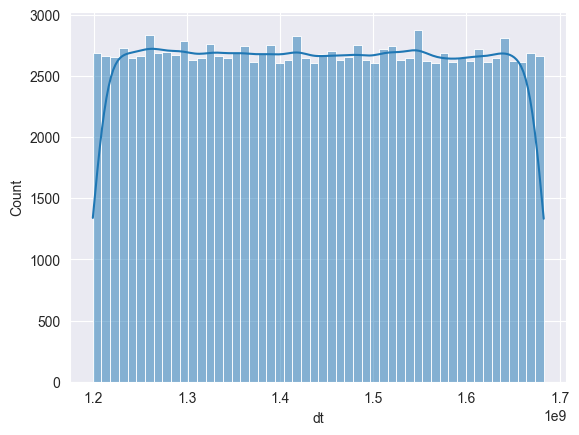

In [141]:
sns.histplot(df['dt'], kde=True)

### City info

Since the dataset is specifically collected for Cluj-Napoca, some attribute seems redundant.


In [142]:
for i in df.columns[2:6]:
    print(f'Unique values of {i} are {pd.unique(df[i])}')


Unique values of timezone are [ 7200 10800]
Unique values of city_name are ['Universitatea Babeș-Bolyai din Cluj-Napoca']
Unique values of lat are [46.767141]
Unique values of lon are [23.592139]


Except for the timezones, since Cluj-Napoca shifts time in Summer (Daylight saving time). We will, however, remove the others columns that are not necessary.

In [143]:
cleaned_df = cleaned_df.drop(df.columns[2:6], axis=1).copy()
cleaned_df

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,NaN,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,NaN,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,NaN,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,NaN,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,NaN,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,NaN,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,NaN,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Temp and Feels-like

Noticing unusual graphs for Temperature's visualization, we may easily detect outliers as a common sense.

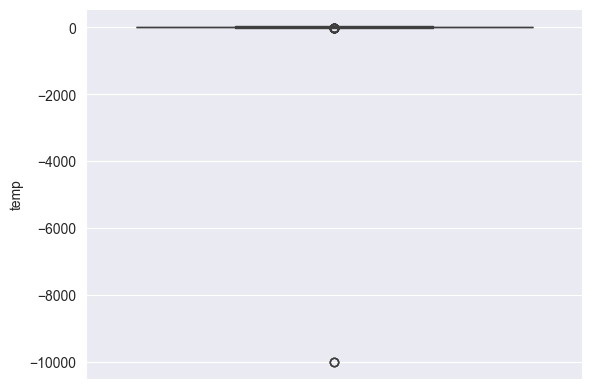

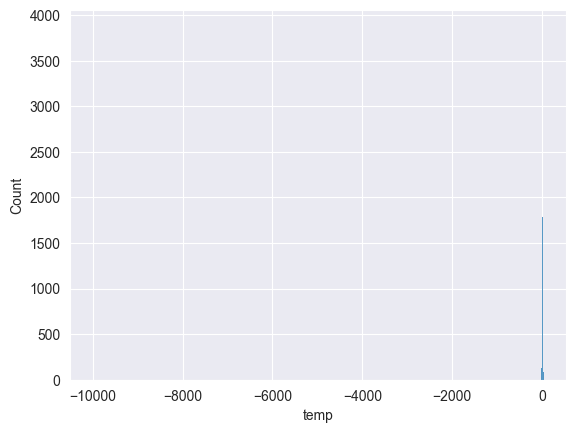

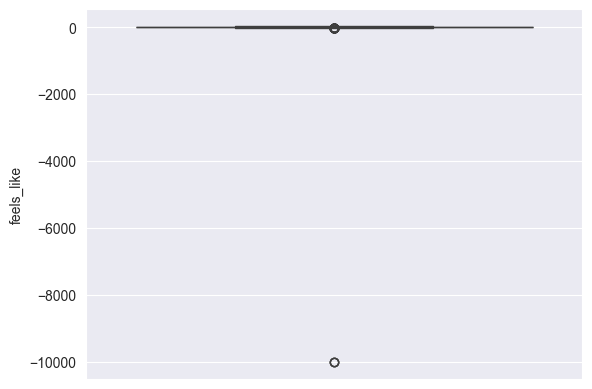

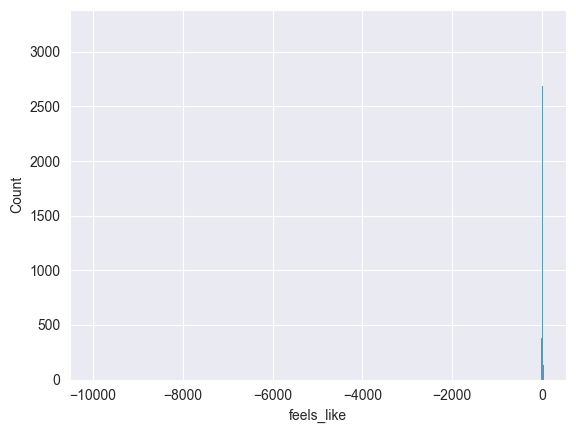

In [144]:
sns.boxplot(df['temp'])
plt.show()
sns.histplot(df['temp'])
plt.show()

sns.boxplot(df['feels_like'])
plt.show()

sns.histplot(df['feels_like'])
plt.show()


In [145]:
df['temp'].min(), df['temp'].max(), df['feels_like'].min(), df['feels_like'].max()

(np.float64(-9998.77),
 np.float64(37.61),
 np.float64(-10005.77),
 np.float64(37.74))

In [146]:
# physically unrealistic cutoff
outliers = df[(df['temp'] < -100) | (df['feels_like'] < -100)]
outliers

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
138604,1680271200,2023-03-31 14:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
138804,1680861600,2023-04-07 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d


The 3 records above showing error data in a specific coordinate. Their temperature and feels_like show obvious inappropriate value. Since there are only 3 records over more than 130 thousand of data point, we will go ahead to remove them as the simplest approach.

In [147]:
cleaned_df = cleaned_df.drop(outliers.index).copy()
cleaned_df

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,NaN,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,NaN,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,NaN,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,NaN,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,NaN,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,NaN,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,NaN,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Visibility

At first glance, the visibility data appears reasonable, ranging from a minimum of 49 meters to a maximum of 10,000 meters.  the latter typically indicating perfectly clear conditions with no significant obstructions.


In [148]:
df['visibility'].describe()

count    137498.000000
mean       8693.875169
std        2743.282608
min          49.000000
25%        9999.000000
50%       10000.000000
75%       10000.000000
max       10000.000000
Name: visibility, dtype: float64

<Axes: xlabel='visibility', ylabel='Count'>

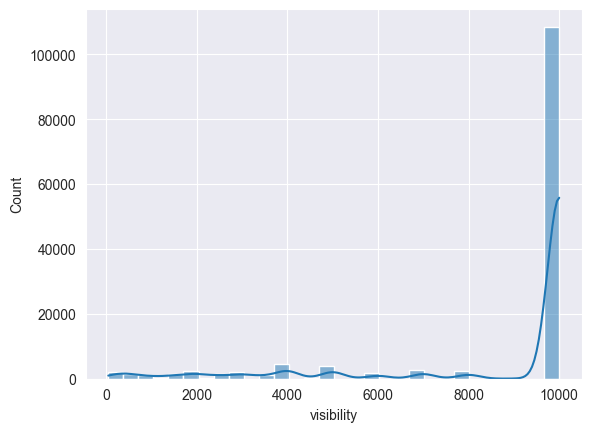

In [149]:
sns.histplot(df['visibility'], bins=30, kde=True)

### Dew point

In [150]:
attribute_dict['dew_point']

'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form'

There were 3 records with missing dew_point values, which also corresponded to temperature outliers. These records were identified as bad data and have been removed in cleaned_df.

In [151]:
df[df['dew_point'].isna()]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
138604,1680271200,2023-03-31 14:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-10005.77,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
138804,1680861600,2023-04-07 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d


In [152]:
cleaned_df[cleaned_df['dew_point'].isna()]

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday


### Pressure

Looking at the describe() results of Pressure attribute, there must be outlier(s) that impact the visualisations. Scientifically, the pressure can never be lower than zero, we will simply remove the only record having this error.

In [153]:
outliers = df[df['pressure']< 0]
outliers

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
138339,1679324400,2023-03-20 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d


<Axes: xlabel='pressure', ylabel='Count'>

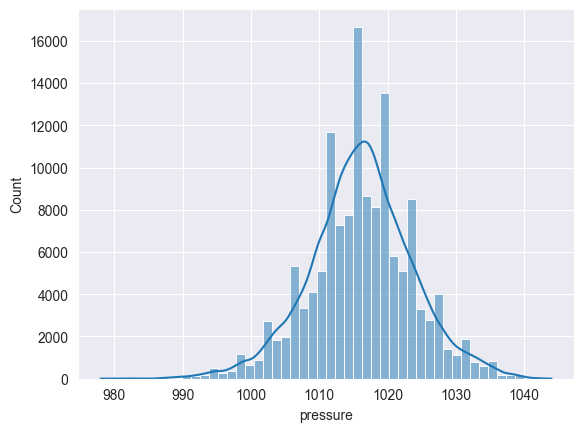

In [154]:
sns.histplot(df[df['pressure'] > 0]['pressure'], bins=50, kde=True)


In [155]:
try:
    cleaned_df = cleaned_df.drop(outliers.index, axis = 0).copy()
except:
    print('Already dropped')
cleaned_df

Already dropped


,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,NaN,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,NaN,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,NaN,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,NaN,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,NaN,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,NaN,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,NaN,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,NaN,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Sea Level and Grnd Level

There are two redundant attributes that having no records at all. They are also not being introduced in the attribute  description. Therefore, we will ignore and drop these 2 columns.

In [156]:
df['sea_level'].notna().sum(), df['grnd_level'].notna().sum()

(np.int64(0), np.int64(0))

In [157]:
cleaned_df = cleaned_df.drop(df[['sea_level', 'grnd_level']], axis = 1)
cleaned_df

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,92,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,92,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,92,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,92,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,93,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,58,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,71,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,76,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,81,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Humidity

The histogram of humidity appears normal, with no suspicious values. Therefore, we will retain the data as is for now.

<Axes: xlabel='humidity', ylabel='Count'>

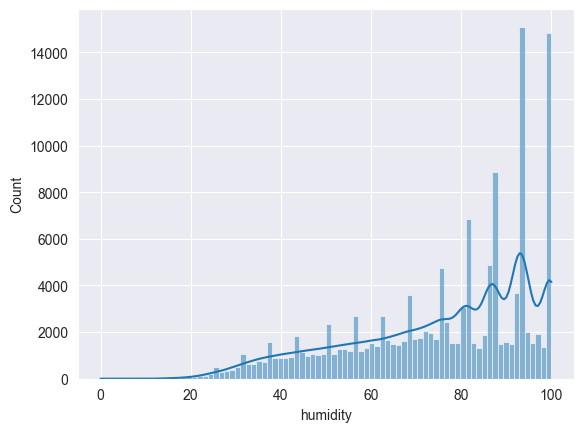

In [158]:
sns.histplot(df['humidity'], kde=True)

### Wind

In [159]:
# Calculate z-scores for a column
df['z_score'] = zscore(df['wind_speed'])

# Detect outliers where |z| > 3
outliers = df[np.abs(df['z_score']) > 3]
outliers

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
138804,1680861600,2023-04-07 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9998.77,NaN,NaN,-9998.77,...,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d,372.608356


In [160]:
try:
    cleaned_df.drop(outliers.index, axis = 1).copy()
except:
    print('Already cleared. ')
cleaned_df

Already cleared. 


,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00+00:00,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,92,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,92,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00+00:00,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,92,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00+00:00,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,92,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00+00:00,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,93,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00+00:00,12.61,10000.0,4.57,11.44,12.04,13.42,1019,58,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00+00:00,10.61,10000.0,5.58,9.58,9.85,11.83,1019,71,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00+00:00,10.07,10000.0,6.04,9.12,8.59,11.83,1019,76,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00+00:00,9.80,10000.0,6.70,9.80,7.48,11.83,1020,81,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


### Rain and Snow

For the raining and snowing amount, there are a few significantly high records compared to the quartile description. However, these can be valid outliers and we may preserve them for further investigation.

In [161]:
rain = df[(df['rain_1h'] > 15) | (df['rain_3h'] > 15)]
rain

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
4886,1216123200,2008-07-15 12:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,18.41,10000.0,15.28,18.45,...,NaN,20.0,NaN,NaN,75,502,Rain,heavy intensity rain,10d,0.097264
5074,1216782000,2008-07-23 03:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.18,10000.0,13.87,14.21,...,NaN,21.0,NaN,NaN,100,701,Mist,mist,50d,-0.014556
5075,1216782000,2008-07-23 03:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.18,10000.0,13.87,14.21,...,NaN,21.0,NaN,NaN,100,502,Rain,heavy intensity rain,10d,-0.014556
5077,1216789200,2008-07-23 05:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.12,4000.0,13.81,14.15,...,16.0,NaN,NaN,NaN,100,502,Rain,heavy intensity rain,10d,-0.014556
5078,1216792800,2008-07-23 06:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,14.31,4000.0,14.00,14.36,...,NaN,26.0,NaN,NaN,100,502,Rain,heavy intensity rain,10d,-0.014556
5092,1216843200,2008-07-23 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,15.26,10000.0,14.79,15.37,...,18.0,NaN,NaN,NaN,100,520,Rain,light intensity shower rain,09n,-0.051829
5093,1216846800,2008-07-23 21:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,15.15,10000.0,14.68,15.25,...,NaN,27.0,NaN,NaN,100,502,Rain,heavy intensity rain,10n,-0.051829
13421,1245769200,2009-06-23 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,17.16,10000.0,16.52,17.44,...,NaN,24.0,NaN,NaN,40,201,Thunderstorm,thunderstorm with rain,11d,-0.051829
13422,1245769200,2009-06-23 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,17.16,10000.0,16.52,17.44,...,NaN,24.0,NaN,NaN,40,502,Rain,heavy intensity rain,10d,-0.051829
22529,1276873200,2010-06-18 15:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,20.98,10000.0,20.98,21.74,...,NaN,20.0,NaN,NaN,75,201,Thunderstorm,thunderstorm with rain,11d,-0.014556


In [162]:
snow = df[(df['snow_1h'] > 2) | (df['snow_3h'] > 5)]
snow

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,z_score
8481,1228676400,2008-12-07 19:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.78,6000.0,1.78,-3.19,...,NaN,NaN,2.22,NaN,100,601,Snow,snow,13n,0.134538
8482,1228680000,2008-12-07 20:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.76,6000.0,1.76,-2.72,...,NaN,NaN,2.06,NaN,100,601,Snow,snow,13n,0.097264
8486,1228694400,2008-12-08 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.53,8000.0,1.53,-1.66,...,NaN,NaN,NaN,9.0,100,601,Snow,snow,13n,0.022718
10148,1234450800,2009-02-12 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.37,1800.0,0.23,0.37,...,NaN,NaN,NaN,6.0,100,701,Mist,mist,50d,-0.051829
10149,1234450800,2009-02-12 15:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.37,1800.0,0.23,0.37,...,NaN,NaN,NaN,6.0,100,601,Snow,snow,13d,-0.051829
10154,1234461600,2009-02-12 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.28,1500.0,-0.28,-0.28,...,NaN,NaN,NaN,6.0,100,701,Mist,mist,50n,-0.051829
10155,1234461600,2009-02-12 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.28,1500.0,-0.28,-0.28,...,NaN,NaN,NaN,6.0,100,601,Snow,snow,13n,-0.051829
11038,1237345200,2009-03-18 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,1.37,4000.0,0.66,1.37,...,NaN,NaN,NaN,7.0,100,601,Snow,snow,13n,-0.089103
19418,1266044400,2010-02-13 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.72,1000.0,0.72,-1.62,...,NaN,NaN,2.28,NaN,100,701,Mist,mist,50d,-0.014556
19419,1266044400,2010-02-13 07:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.72,1000.0,0.72,-1.62,...,NaN,NaN,2.28,NaN,100,612,Snow,light shower sleet,13d,-0.014556


### Clouds all

Cloudliness is in percentage and no value exceed the normal range.

<Axes: ylabel='clouds_all'>

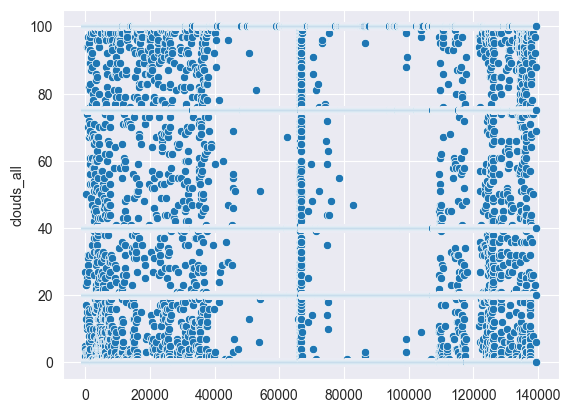

In [163]:
sns.scatterplot(df['clouds_all'])

### Weather ID

There are 34 unique IDs for weather icons.

In [164]:
pd.unique(df['weather_id'])


array([600, 804, 701, 601, 803, 741, 802, 801, 800, 500, 520, 612, 620,
       501, 300, 502, 201, 211, 521, 711, 621, 611, 202, 301, 721, 522,
       221, 200, 771, 761, 622, 321, 602, 615])

<Axes: xlabel='weather_id', ylabel='Count'>

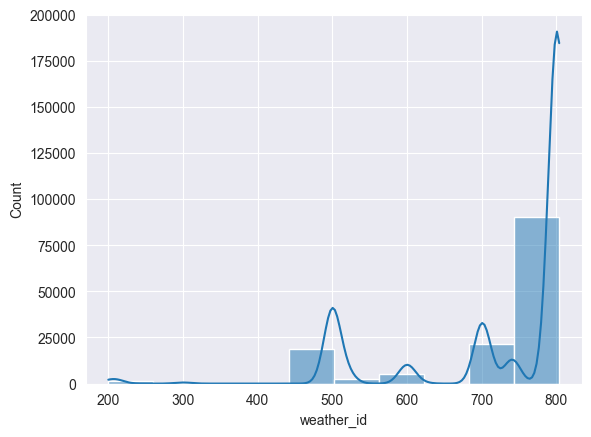

In [165]:
sns.histplot(df['weather_id'], bins=10, kde=True)

### Others

In [166]:
cleaned_df.describe()

,dt,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,hour,day,month,year,weekday
count,1.393910e+05,139391.000000,137498.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,...,1847.000000,4572.000000,821.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000,139391.000000
mean,1.440546e+09,9.833593,8693.875169,5.084661,8.744696,8.542779,12.123035,1016.129671,75.659024,2.318812,...,1.859643,0.361105,0.908526,38.215423,728.713676,11.486645,15.747631,6.431412,2015.156043,2.999656
std,1.396591e+08,9.460105,2743.282608,7.568612,10.258701,9.541555,9.636087,7.612546,19.814327,1.694446,...,3.033603,0.300892,1.108691,38.417050,121.070980,6.933797,8.794107,3.496364,4.428039,2.000244
min,1.199146e+09,-23.020000,49.000000,-24.390000,-29.270000,-26.180000,-21.250000,978.000000,7.000000,0.000000,...,0.100000,0.100000,0.100000,0.000000,200.000000,0.000000,1.000000,1.000000,2008.000000,0.000000
25%,1.319535e+09,2.240000,9999.000000,-0.450000,0.690000,0.840000,4.700000,1012.000000,62.000000,1.030000,...,0.200000,0.160000,0.200000,0.000000,701.000000,5.000000,8.000000,3.000000,2011.000000,1.000000
50%,1.440342e+09,9.700000,10000.000000,5.150000,8.800000,8.450000,12.000000,1016.000000,81.000000,2.000000,...,0.800000,0.260000,0.500000,20.000000,800.000000,11.000000,16.000000,6.000000,2015.000000,3.000000
75%,1.561052e+09,16.910000,10000.000000,11.350000,16.700000,15.750000,19.400000,1021.000000,93.000000,3.100000,...,2.000000,0.450000,1.000000,75.000000,801.000000,18.000000,23.000000,10.000000,2019.000000,5.000000
max,1.682982e+09,37.610000,10000.000000,25.190000,37.740000,37.000000,42.700000,1044.000000,100.000000,18.000000,...,27.000000,2.280000,9.000000,100.000000,804.000000,23.000000,31.000000,12.000000,2023.000000,6.000000


In [167]:
cleaned_df.shape

(139391, 27)

## Weather ID

The dataset includes a weather_id field, but it does not correspond one-to-one with weather conditions. Instead, each weather category (weather_main) can be associated with one or more unique IDs. Being aware of this, we will use weather_main for building model.


In [189]:
cleaned_df.groupby('weather_main')['weather_id'].nunique()

weather_main
Clear           1
Clouds          4
Drizzle         3
Dust            1
Fog             1
Haze            1
Mist            1
Rain            6
Smoke           1
Snow            9
Squall          1
Thunderstorm    5
Name: weather_id, dtype: int64

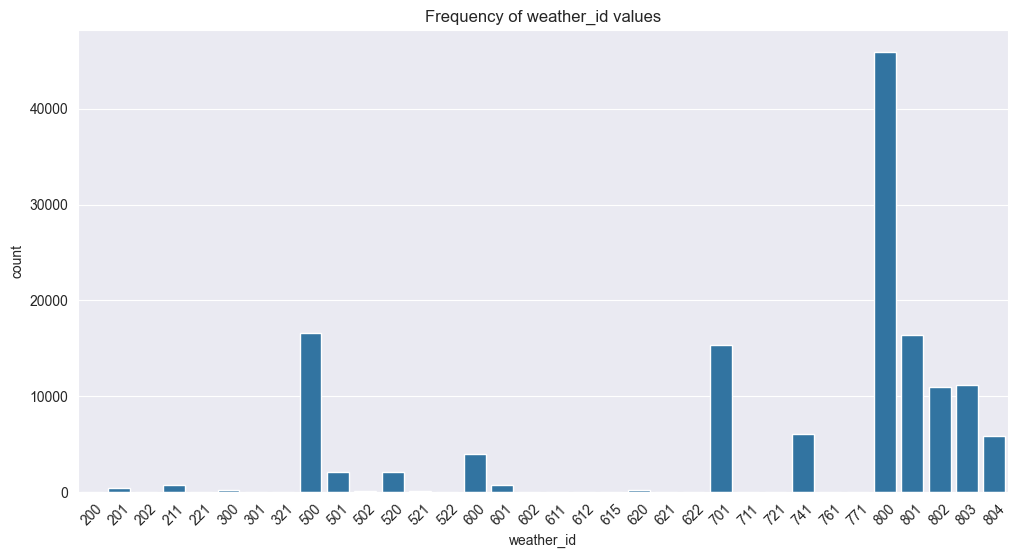

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='weather_id', data=cleaned_df)
plt.xticks(rotation=45)
plt.title("Frequency of weather_id values")
plt.show()


## Summary

- No missing value was dropped.
- Not yet found out the duplication reasons.
- Converted date time format.
- Sorted the dataframe by date time in ascending order.
- Dropped redundant location info.
- Dropped records with Temp, Feels-like, Dew_point, Pressure, Wind,  outliers
- Dropped Sea level and Grnd Level columns


## Feature Relationships

In [168]:
cleaned_df.columns

Index(['dt', 'dt_iso', 'temp', 'visibility', 'dew_point', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'hour', 'day', 'month', 'year', 'weekday'],
      dtype='object')

### Scatter plot

Below is an example of temperature values over time, which clearly follow a seasonal pattern, reflecting typical weather changes throughout the year.


<Axes: xlabel='dt_iso', ylabel='temp'>

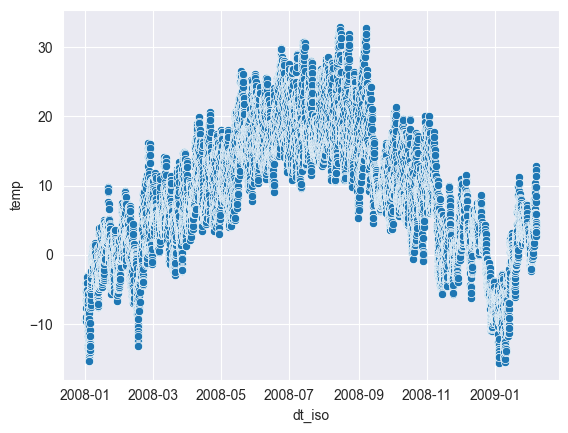

In [169]:
sns.scatterplot(x = cleaned_df['dt_iso'].head(10000), y = cleaned_df['temp'].head(10000))

### Correlation

To gaining insights into how different factors may influence each other, we generate a the correlation heatmap using Seaborn’s built-in function.

In [170]:
cleaned_df['dt_iso']

0        2008-01-01 00:00:00+00:00
1        2008-01-01 01:00:00+00:00
2        2008-01-01 02:00:00+00:00
3        2008-01-01 03:00:00+00:00
4        2008-01-01 04:00:00+00:00
                    ...           
139389   2023-05-01 19:00:00+00:00
139390   2023-05-01 20:00:00+00:00
139391   2023-05-01 21:00:00+00:00
139392   2023-05-01 22:00:00+00:00
139393   2023-05-01 23:00:00+00:00
Name: dt_iso, Length: 139391, dtype: datetime64[ns, UTC]

<Axes: >

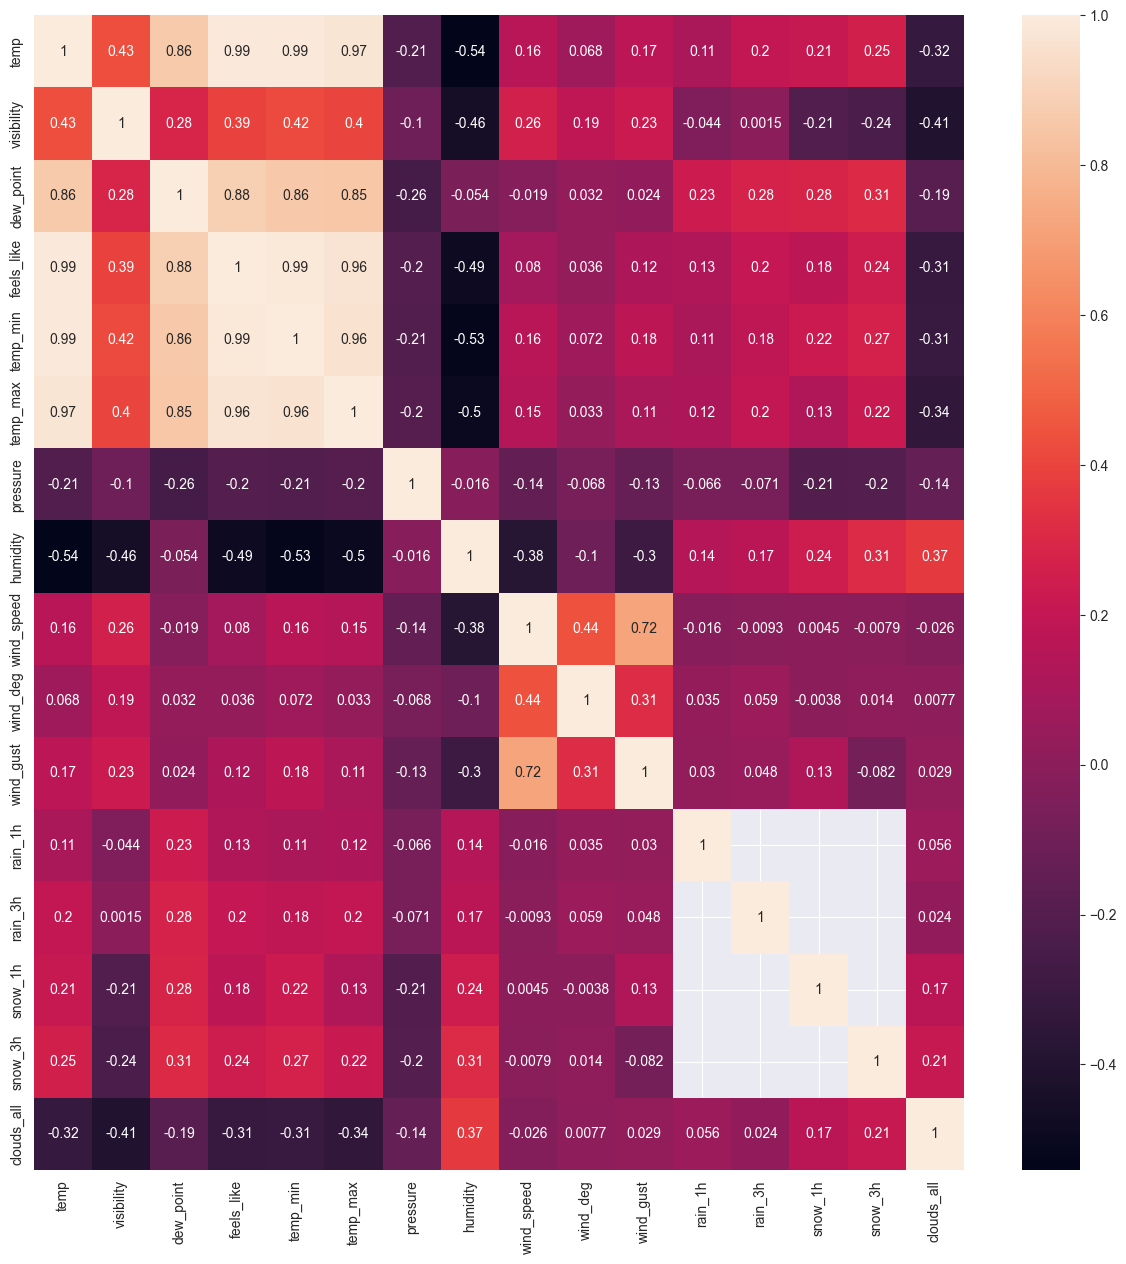

In [171]:
df_corr = cleaned_df[[ 'temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max', \
                      'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',\
                      'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all'\
                      ]].corr()
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)

# Models

In this project, we will go with Supervised learning - which "is defined by its use of labelled datasets to train algorithms that to classify data or predict outcomes accurately."

In [57]:
cleaned_df.columns

Index(['dt', 'dt_iso', 'temp', 'visibility', 'dew_point', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'hour', 'day', 'month', 'year', 'weekday'],
      dtype='object')

In [58]:
cleaned_df.sample(20)

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
71523,1446728400,2015-11-05 13:00:00+00:00,11.82,10000.0,2.82,10.47,11.75,20.30,1020,54,...,0,800,Clear,sky is clear,01d,13,5,11,2015,3
21651,1273831200,2010-05-14 10:00:00+00:00,19.02,10000.0,10.32,18.47,18.27,20.84,1007,57,...,75,500,Rain,light rain,10d,10,14,5,2010,4
68750,1436979600,2015-07-15 17:00:00+00:00,22.03,9999.0,13.91,21.86,21.24,23.84,1017,60,...,20,801,Clouds,few clouds,02d,17,15,7,2015,2
101609,1550635200,2019-02-20 04:00:00+00:00,-4.83,600.0,-6.58,-4.83,-5.30,0.64,1018,86,...,0,741,Fog,fog,50n,4,20,2,2019,2
61650,1412575200,2014-10-06 06:00:00+00:00,6.26,5000.0,4.09,6.26,3.63,11.90,1023,86,...,0,701,Mist,mist,50d,6,6,10,2014,0
6789,1222808400,2008-09-30 21:00:00+00:00,6.96,10000.0,5.91,5.65,5.77,8.06,1016,93,...,0,800,Clear,sky is clear,01n,21,30,9,2008,1
18354,1262556000,2010-01-03 22:00:00+00:00,-5.36,4000.0,-6.71,-8.70,-6.15,-4.16,1017,89,...,100,600,Snow,light snow,13n,22,3,1,2010,6
105883,1565820000,2019-08-14 22:00:00+00:00,15.87,9999.0,12.80,15.65,15.08,17.10,1014,82,...,40,501,Rain,moderate rain,10n,22,14,8,2019,2
85474,1495213200,2017-05-19 17:00:00+00:00,21.85,9999.0,10.67,21.37,19.20,23.67,1014,49,...,20,801,Clouds,few clouds,02d,17,19,5,2017,4
32809,1312308000,2011-08-02 18:00:00+00:00,19.97,10000.0,14.77,19.90,19.03,20.85,1016,72,...,20,801,Clouds,few clouds,02n,18,2,8,2011,1


In [59]:
cleaned_df['weather_main'].unique()

array(['Snow', 'Clouds', 'Mist', 'Fog', 'Clear', 'Rain', 'Drizzle',
       'Thunderstorm', 'Smoke', 'Haze', 'Squall', 'Dust'], dtype=object)

## Linear Regression

We'll begin with the most fundamental machine learning model—Linear Regression. Since this model isn't designed to handle complex patterns, we'll apply it to predict the most straightforward relationship: the one between actual temperature (feature) and 'feels-like' temperature (target).


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Determine X and y
X = cleaned_df['temp'].values.reshape(-1, 1)
y = cleaned_df['feels_like'].values  # 1D target is fine

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

# Training
model = LinearRegression()
model_name = type(model).__name__
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': [model_name],
    'Accuracy': [model.score(X_test, y_test)],
    'MSE': [mean_squared_error(y_test, y_pred)],
    'MAE': [mean_absolute_error(y_test, y_pred)],
    'RMSE': [r2_score(y_test, y_pred)]
})

results_df

,Model,Accuracy,MSE,MAE,RMSE
0,LinearRegression,0.984978,1.578061,0.942388,0.984978


The model predicts feels-like temperature from real temperature very accurately, with most predictions within about 1 degree of the actual value, and explaining nearly all the variance. This suggests a strong linear relationship between these two variables.

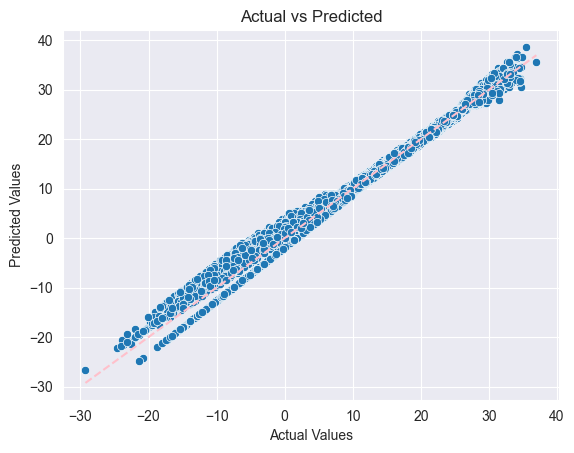

In [62]:
# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot of Actual vs Predicted
sns.scatterplot(data=df_plot, x='Actual', y='Predicted')

# Add a diagonal line for perfect prediction
# If predictions are perfect, all points would fall on a straight line (y = x).
plt.plot([df_plot.Actual.min(), df_plot.Actual.max()],
         [df_plot.Actual.min(), df_plot.Actual.max()],
         color='pink', linestyle='--')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Overprediction (points above the line)
# Underprediction (points below the line)
# Bias or clustering patterns
plt.show()


## K-nearest Regression

Apply K-nearest Regression to classify weather conditions based on most other attributes.

In [64]:
# print(df['weather_main'].value_counts())
# # Replace the specified classes with 'Other'
# modelling_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')
# le = LabelEncoder()
# y_encoded = le.fit_transform(df['weather_main'])
# print(cleaned_df['weather_main'].value_counts())


weather_main
Clear           45889
Clouds          44425
Rain            21044
Mist            15401
Fog              6075
Snow             4967
Thunderstorm     1272
Drizzle           273
Smoke              43
Haze                2
Dust                2
Squall              1
Name: count, dtype: int64


NameError: name 'le' is not defined

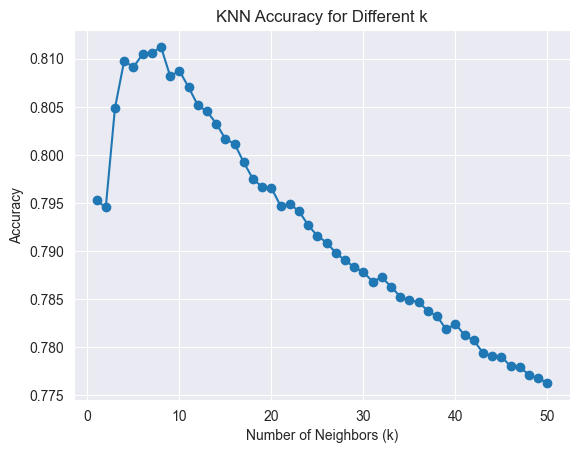

Best k found: 8

Classification Report:
              precision    recall  f1-score   support

       Clear       0.90      0.97      0.93      9178
      Clouds       0.84      0.88      0.86      8885
     Drizzle       0.12      0.07      0.09        55
         Fog       0.69      0.61      0.65      1215
        Mist       0.65      0.68      0.66      3080
       Other       0.00      0.00      0.00         1
        Rain       0.80      0.63      0.71      4209
       Smoke       0.00      0.00      0.00         9
        Snow       0.50      0.44      0.47       993
Thunderstorm       0.05      0.03      0.04       254

    accuracy                           0.81     27879
   macro avg       0.45      0.43      0.44     27879
weighted avg       0.80      0.81      0.81     27879



D:\Code-PythonAndADS\.venv1\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Code-PythonAndADS\.venv1\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Code-PythonAndADS\.venv1\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [281]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
#
# # 1. Combine rare classes into 'Other'
# cleaned_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')
#
# # 2. Features and target
# features = [
#     'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
#     'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
#     'visibility', 'hour', 'day', 'month', 'year', 'weekday'
# ]
# target = 'weather_main'
#
# X = cleaned_df[features].fillna(0)
# y = cleaned_df[target]
#
# # 3. Encode labels
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
#
# # 4. Scale features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
#
# # 5. Split dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded
# )
#
# # 🔍 6. Find optimal k
# k_range = range(1, 51)
# scores = []
#
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Use distance weighting
#     knn.fit(X_train, y_train)
#     scores.append(knn.score(X_test, y_test))
#
# # Plot k vs accuracy
# plt.plot(k_range, scores, marker='o')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Accuracy')
# plt.title('KNN Accuracy for Different k')
# plt.grid(True)
# plt.show()
#
# # 7. Use best k
# best_k = k_range[scores.index(max(scores))]
# print(f"Best k found: {best_k}")
#
# # 8. Final model with best k
# knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
#
# # 9. Evaluate
# print("\nClassification Report:")
# classification_report(y_test, y_pred, target_names=le.classes_)


## Decision Trees

**Problem Statement:**  Classify the weather condition using the `weather_main` attribute based on various meteorological features.

#### Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#### Define features and target

Overall, most features appear relevant for weather classification. Therefore, we will include them as model inputs, excluding attributes like weather_description and weather_icon, which do not contribute meaningful value.


In [174]:
print(cleaned_df.columns)
attribute_dict

Index(['dt', 'dt_iso', 'temp', 'visibility', 'dew_point', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'hour', 'day', 'month', 'year', 'weekday'],
      dtype='object')


{'dt': 'Time of data calculation, unix, UTC',
 'dt_iso': 'Date and time in UTC format',
 'timezone': 'Shift in seconds from UTC',
 'city_name': 'City name',
 'lat': 'Geographical coordinates of the location (latitude)',
 'lon': 'Geographical coordinates of the location (longitude)',
 'temp': 'Temperature',
 'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.',
 'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
 'feels_like': 'This temperature parameter accounts for the human perception of weather',
 'temp_min': 'Minimum temperature at the moment (optional)',
 'temp_max': 'Maximum temperature at the moment (optional)',
 'pressure': 'N/A',
 'sea_level': 'N/A',
 'grnd_level': 'N/A',
 'humidity': 'Humidity, %',


Our target is weather_main with 12 unique weather conditions.

However, there are three weather conditions having significantly few records, making it difficult for the model to learn and predict them effectively. To address this, we grouped them under a common category labeled 'Other'.

Additionally, the Decision Trees cannot handle text or string categories directly.Instead, they require numerical values to perform splits (e.g., weather_main = 600, not 'Clouds'). Therfore, we generally need to encode categorical variables using `LabelEncoder` from `sklearn` library, but not necessarily scale or normalize them.

In [185]:
cleaned_df['weather_main'].value_counts()

weather_main
Clear           45888
Clouds          44423
Rain            21044
Mist            15401
Fog              6075
Snow             4967
Thunderstorm     1272
Drizzle           273
Smoke              43
Haze                2
Dust                2
Squall              1
Name: count, dtype: int64

In [190]:
# Combine rare classes into 'Other'
modelling_df = cleaned_df.copy()
modelling_df['weather_main'] = modelling_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')

# Feature and target selection
features = [
    'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
    'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
    'visibility', 'hour', 'day', 'month', 'year', 'weekday'
]
target = 'weather_main'

X = modelling_df[features]
y = modelling_df[target]

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [191]:
# Double check features
X.sample(5)

,temp,humidity,wind_speed,pressure,dew_point,clouds_all,rain_1h,rain_3h,snow_1h,snow_3h,visibility,hour,day,month,year,weekday
27310,-1.84,96,1.00,1018,-2.33,75,NaN,NaN,NaN,NaN,4000.0,20,26,12,2010,6
42512,17.31,70,3.00,1012,11.79,0,NaN,NaN,NaN,NaN,10000.0,3,26,8,2012,6
54724,-4.28,100,0.00,1023,-4.28,100,NaN,NaN,NaN,NaN,300.0,4,30,12,2013,0
58412,27.75,37,3.10,1012,11.74,40,NaN,NaN,NaN,NaN,9999.0,13,26,5,2014,0
34947,6.49,66,0.74,1030,0.60,0,NaN,NaN,NaN,NaN,NaN,9,29,10,2011,5


In [200]:
# View encoded target values
list(zip(le.classes_, le.transform(le.classes_)))

[('Clear', np.int64(0)),
 ('Clouds', np.int64(1)),
 ('Drizzle', np.int64(2)),
 ('Fog', np.int64(3)),
 ('Mist', np.int64(4)),
 ('Other', np.int64(5)),
 ('Rain', np.int64(6)),
 ('Smoke', np.int64(7)),
 ('Snow', np.int64(8)),
 ('Thunderstorm', np.int64(9))]

#### Build model

In [204]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded
)

# 6. Initialize and train the Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=14)
tree.fit(X_train, y_train)

# 7. Predict
y_pred = tree.predict(X_test)

#### Evaluate model

In [205]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

       Clear       0.99      0.98      0.99      9178
      Clouds       0.93      0.92      0.92      8885
     Drizzle       0.02      0.04      0.03        55
         Fog       0.64      0.68      0.66      1215
        Mist       0.63      0.64      0.64      3080
       Other       0.00      0.00      0.00         1
        Rain       0.82      0.83      0.83      4209
       Smoke       0.00      0.00      0.00         9
        Snow       0.42      0.40      0.41       993
Thunderstorm       0.08      0.09      0.08       254

    accuracy                           0.86     27879
   macro avg       0.45      0.46      0.46     27879
weighted avg       0.86      0.86      0.86     27879



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='YlGnBu')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

Explanation: Random Forest is an ensemble learning method that constructs a multitude of decision trees at training time and outputs the mean prediction (for regression) of the individual trees. It addresses the overfitting problem often associated with single decision trees and generally provides higher accuracy and better generalization. It introduces randomness by bootstrapping samples and random subset of features for each tree.

Why it suits better: As an ensemble of Decision Trees, Random Forest inherits the ability to model non-linear relationships while significantly reducing variance and improving robustness. It's highly effective for complex datasets with many features and interactions, which is typical
for weather data. It also provides feature importance, which can be valuable for understanding the underlying drivers of weather patterns.

### References
https://link.springer.com/chapter/10.1007/978-981-16-2164-2_19

https://pdfs.semanticscholar.org/4e47/50e8ed593a8a08c6de47525cddec4f9de678.pdf

Classification Report:
              precision    recall  f1-score   support

       Clear       0.98      1.00      0.99      9178
      Clouds       0.93      0.98      0.95      8885
     Drizzle       0.04      0.02      0.03        55
         Fog       0.79      0.67      0.73      1215
        Mist       0.70      0.69      0.70      3080
       Other       0.00      0.00      0.00         1
        Rain       0.89      0.84      0.87      4209
       Smoke       0.00      0.00      0.00         9
        Snow       0.52      0.48      0.50       993
Thunderstorm       0.02      0.01      0.01       254

    accuracy                           0.89     27879
   macro avg       0.49      0.47      0.48     27879
weighted avg       0.88      0.89      0.89     27879



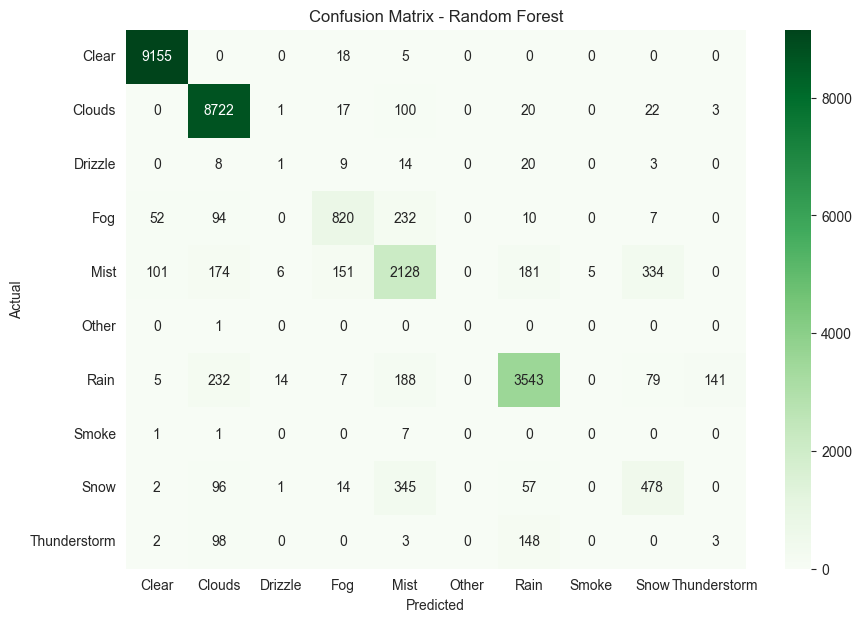

In [284]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# # 1. Combine rare classes
# cleaned_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')
#
# # 2. Features and target
# features = [
#     'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
#     'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
#     'visibility', 'hour', 'day', 'month', 'year', 'weekday'
# ]
# target = 'weather_main'
#
# X = cleaned_df[features].fillna(0)
# y = cleaned_df[target]
#
# # 3. Encode target
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
#
# # 4. Feature scaling (optional for tree models, but okay to leave in)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
#
# # 5. Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded
# )
#
# # 6. Initialize and train Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=14)
# rf.fit(X_train, y_train)
#
# # 7. Predict
# y_pred = rf.predict(X_test)
#
# # 8. Evaluate
# print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))
#
# # 9. Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
# plt.title('Confusion Matrix - Random Forest')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


## Esemble Learning

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

       Clear       0.96      1.00      0.98      9178
      Clouds       0.91      0.98      0.94      8885
     Drizzle       0.12      0.04      0.06        55
         Fog       0.76      0.61      0.67      1215
        Mist       0.70      0.69      0.70      3080
       Other       0.00      0.00      0.00         1
        Rain       0.91      0.85      0.88      4209
       Smoke       0.00      0.00      0.00         9
        Snow       0.58      0.48      0.52       993
Thunderstorm       0.16      0.01      0.02       254

    accuracy                           0.89     27879
   macro avg       0.51      0.47      0.48     27879
weighted avg       0.88      0.89      0.88     27879



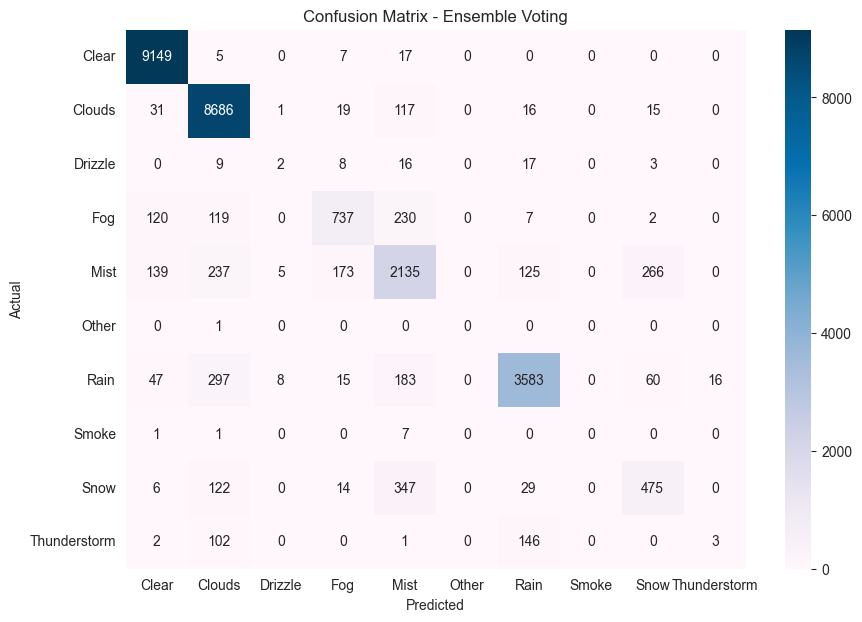

In [285]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Combine rare classes
cleaned_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')

# 2. Features and target
features = [
    'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
    'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
    'visibility', 'hour', 'day', 'month', 'year', 'weekday'
]
target = 'weather_main'

X = cleaned_df[features].fillna(0)
y = cleaned_df[target]

# 3. Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=14, stratify=y_encoded
)

# 6. Define base models
log_clf = LogisticRegression(max_iter=1000, random_state=14)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=14)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# 7. Create ensemble model using Voting
ensemble_model = VotingClassifier(
    estimators=[
        ('logreg', log_clf),
        ('rf', rf_clf),
        ('knn', knn_clf)
    ],
    voting='hard'  # or 'soft' for probability-based
)

# 8. Train ensemble model
ensemble_model.fit(X_train, y_train)

# 9. Predict
y_pred = ensemble_model.predict(X_test)

# 10. Evaluation
print("Classification Report (Voting Classifier):")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

# 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='PuBu')
plt.title('Confusion Matrix - Ensemble Voting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Deep Learning

D:\Code-PythonAndADS\.venv1\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7223 - loss: 0.8430 - val_accuracy: 0.8823 - val_loss: 0.3705
Epoch 2/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8768 - loss: 0.3942 - val_accuracy: 0.8965 - val_loss: 0.3358
Epoch 3/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8873 - loss: 0.3581 - val_accuracy: 0.9006 - val_loss: 0.3197
Epoch 4/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8903 - loss: 0.3437 - val_accuracy: 0.9040 - val_loss: 0.3113
Epoch 5/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8943 - loss: 0.3365 - val_accuracy: 0.9048 - val_loss: 0.3033
Epoch 6/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8969 - loss: 0.3259 - val_accuracy: 0.9051 - val_loss: 0.3006
Epoch 7/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8965 - loss: 0.3237 - val_accuracy: 0.9044 - val_loss: 0.3018
Epoch 8/30
2788/2788 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8985 - loss: 0.

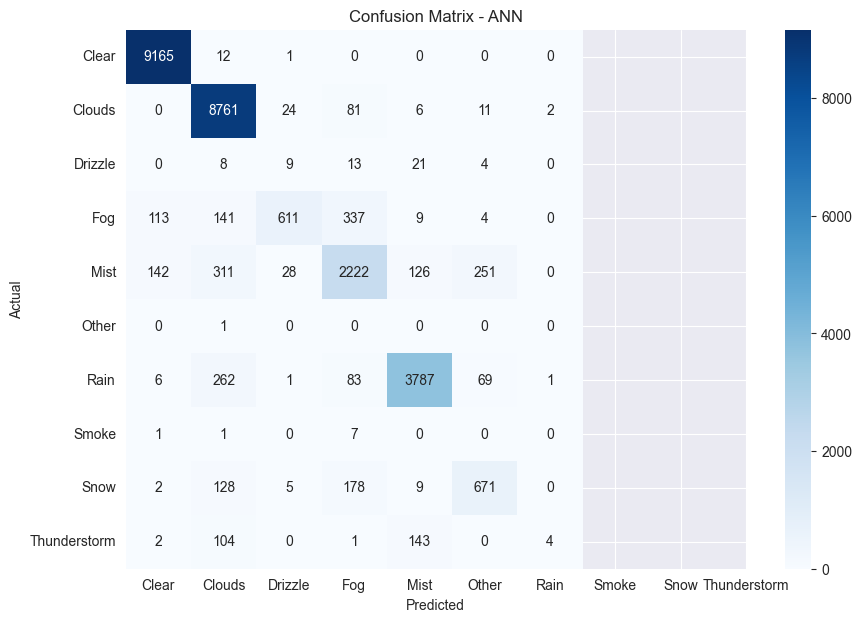

In [287]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Combine rare classes
cleaned_df['weather_main'] = cleaned_df['weather_main'].replace(['Haze', 'Dust', 'Squall'], 'Other')

# 2. Feature and target
features = [
    'temp', 'humidity', 'wind_speed', 'pressure', 'dew_point',
    'clouds_all', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
    'visibility', 'hour', 'day', 'month', 'year', 'weekday'
]
target = 'weather_main'

X = cleaned_df[features].fillna(0)
y = cleaned_df[target]

# 3. Encode target to one-hot format
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# 4. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=14, stratify=y_encoded
)

# 6. Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# 7. Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 8. Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# 9. Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# 10. Predict and report
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=le.classes_, zero_division=0))

# 11. Confusion Matrix
cm = pd.crosstab(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#